In [7]:
if "running_all" not in globals():
    from ipywidgets import widgets
    matrices = ["ex10", "msc04515", "s1rmq4m1", "Na5", "bcsstk18",
                "vibrobox", "cbuckle", "Pres_Poisson", "raefsky4", "vanbody",
                "ct20stif", "cant", "bcircuit", "apache1", "consph"]
    b = widgets.Button(description="Run over all matrices", button_style="success")
    output = widgets.Output()

    display(b, output)

    def run_over_all_matrices(button):
        global running_all
        global matrix
        running_all = True
        with output:
            for matrix in matrices:
                print(f"Running {matrix}...")
                %run ./iteration_2norm_corrs.ipynb # will output at this cell rather than later
            print("Finished!")
    b.on_click(run_over_all_matrices)

Button(button_style='success', description='Run over all matrices', style=ButtonStyle())

Output()

In [8]:
if "running_all" not in globals():
    matrix = "cant"  # manually set to run over one matrix
matrix

'cant'

In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
TESTING_DATA_SIZE = 1000

df = pd.read_csv(f"data/{matrix}_{TESTING_DATA_SIZE}.csv")
df.head()

,mat_name,errorfree_iterations,tol,maxiter,error_pos,error_iter,solve_iterations,final_relres,did_converge,realtime_s,pos_2norm,n_rows,slowdown
0,cant.mat,394,0.000001,39400,26110,339,8571,9.898982e-07,True,55.580377,4378.366731,62451,21.753807
1,cant.mat,394,0.000001,39400,38879,385,1219,9.942652e-07,True,7.981440,2405.097831,62451,3.093909
2,cant.mat,394,0.000001,39400,4442,130,14725,9.806331e-07,True,95.089715,8022.330094,62451,37.373096
3,cant.mat,394,0.000001,39400,52002,370,8819,9.935520e-07,True,56.921501,2174.561978,62451,22.383249
4,cant.mat,394,0.000001,39400,48322,283,39399,7.035883e-06,False,254.006677,8022.330094,62451,99.997462


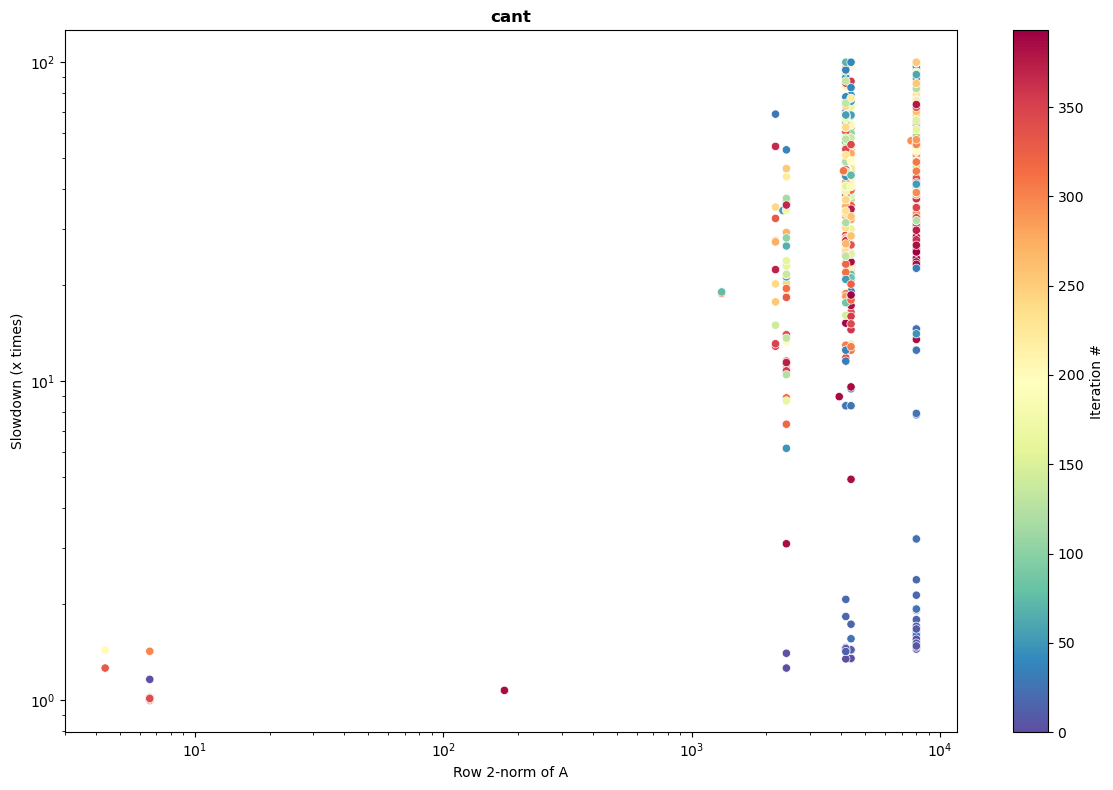

In [11]:
plt.gcf().set_size_inches(12, 8)
plt.gcf().set_dpi(100)

ax = sns.scatterplot(df, x="pos_2norm", y="slowdown", hue="error_iter", palette="Spectral_r", legend=False)
norm = plt.Normalize(df['error_iter'].min(), df['error_iter'].max())
sm = plt.cm.ScalarMappable(cmap="Spectral_r", norm=norm)
sm.set_array([])
ax.figure.colorbar(sm, ax=plt.gca(), label="Iteration #")

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Row 2-norm of A")
plt.ylabel("Slowdown (x times)")
plt.title(f"{matrix}", weight="bold")
os.makedirs(f"./figures/{matrix}", exist_ok=True)
plt.tight_layout()
plt.savefig(f"./figures/{matrix}/2norm_slowdown_correlation_by_iter.png")
plt.show()

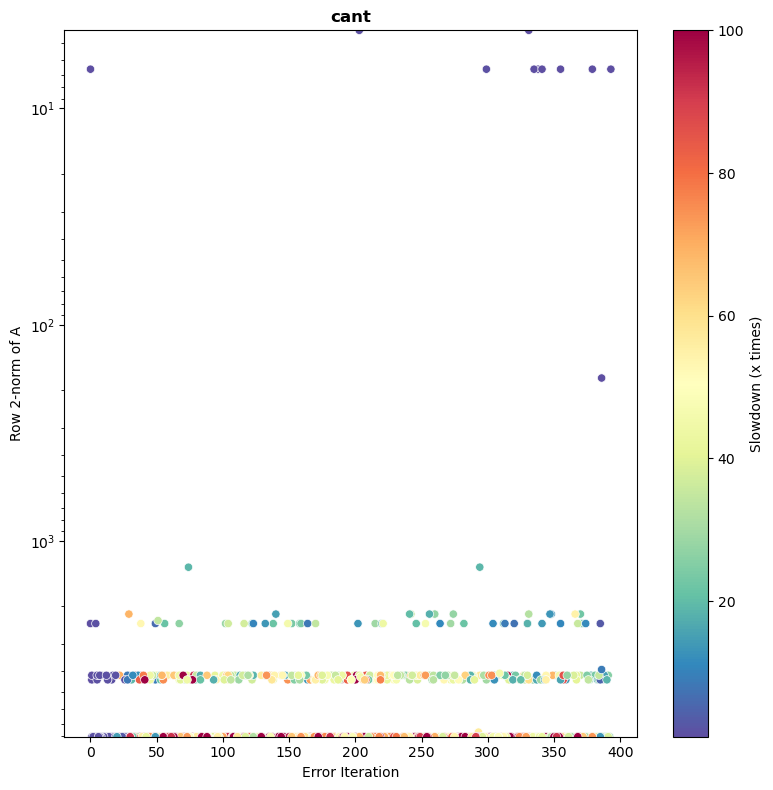

In [12]:
plt.gcf().set_size_inches(8, 8)
plt.gcf().set_dpi(100)

ax = sns.scatterplot(df, x="error_iter", y="pos_2norm", hue="slowdown", legend=False, palette="Spectral_r")
norm = plt.Normalize(1, 100)
sm = plt.cm.ScalarMappable(cmap="Spectral_r", norm=norm)
sm.set_array([])
ax.figure.colorbar(sm, ax=plt.gca(), label="Slowdown (x times)")

plt.yscale("log")
plt.ylim(df["pos_2norm"].min(), df["pos_2norm"].max())
ax.invert_yaxis()
plt.xlabel("Error Iteration")
plt.ylabel("Row 2-norm of A")
plt.title(f"{matrix}", weight="bold")
plt.tight_layout()
plt.savefig(f"./figures/{matrix}/slowdown_by_iter_and_2norm.png")
plt.show()